In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv('body_level_classification_train.csv')
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [3]:
df.loc[df['Food_Between_Meals'] == 'no', 'Food_Between_Meals'] = 0
df.loc[df['Food_Between_Meals'] == 'Sometimes', 'Food_Between_Meals'] = 1
df.loc[df['Food_Between_Meals'] == 'Frequently', 'Food_Between_Meals'] = 2
df.loc[df['Food_Between_Meals'] == 'Always', 'Food_Between_Meals']= 3

df.loc[df['Alcohol_Consump'] == 'no', 'Alcohol_Consump'] = 0
df.loc[df['Alcohol_Consump'] == 'Sometimes', 'Alcohol_Consump'] = 1
df.loc[df['Alcohol_Consump'] == 'Frequently', 'Alcohol_Consump'] = 2
df.loc[df['Alcohol_Consump'] == 'Always', 'Alcohol_Consump']= 3

In [4]:
df = pd.concat([df, pd.get_dummies(df['Transport'])], axis=1)
df.drop(['Transport'], axis='columns', inplace=True)

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['H_Cal_Consump'] = label_encoder.fit_transform(df['H_Cal_Consump'])
df['H_Cal_Burn'] = label_encoder.fit_transform(df['H_Cal_Burn'])
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])
df['Fam_Hist'] = label_encoder.fit_transform(df['Fam_Hist'])


df.loc[df['Body_Level'] == 'Body Level 1', 'Body_Level'] = 0
df.loc[df['Body_Level'] == 'Body Level 2', 'Body_Level'] = 1
df.loc[df['Body_Level'] == 'Body Level 3', 'Body_Level'] = 2
df.loc[df['Body_Level'] == 'Body Level 4', 'Body_Level']= 3

In [6]:
y = df['Body_Level']
df.drop(['Body_Level'], axis='columns', inplace=True)
X = df

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
t = ['Food_Between_Meals', 'Alcohol_Consump', 'Age', 'Height', 'Weight', 'Veg_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
means = []
std = []
for i in t:
    means.append(np.mean(X_train[i]))
    std.append(np.std(X_train[i]))
    X_train[i] = (X_train[i] - np.mean(X_train[i]))/np.std(X_train[i])

In [9]:
t = ['Food_Between_Meals', 'Alcohol_Consump', 'Age', 'Height', 'Weight', 'Veg_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
for idx, val in enumerate(t):
    X_test[val] = (X_test[val] - means[idx])/std[idx]

In [13]:
def model_pipeline(X_train, Y_train, X_valid, Y_valid, model):

    model.fit(X_train, Y_train)
    #train_acc = model.score(X_train, Y_train)

    predictions = model.predict(X_valid)

    val_acc = accuracy_score(Y_valid, predictions)
    cm = confusion_matrix(Y_valid, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    report = classification_report(Y_valid, predictions)

    disp.plot()
    plt.show()

    weighted_f1 = f1_score(Y_valid, predictions, average='weighted')

    return model, report, val_acc, weighted_f1

c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


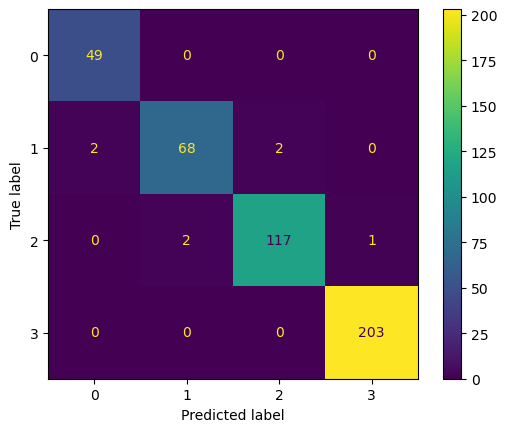

weighted_f1 =  0.9841633214618373


In [31]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear", "sigmoid"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2,3], "C": [1, 10, 100, 1000]},
]

scores = "f1_weighted"

grid_search = GridSearchCV(
    SVC(), tuned_parameters, scoring=scores
)

model, report, val_acc, weighted_f1 = model_pipeline(X_train, y_train.astype('int'), list(X_test.values), list(y_test.values), grid_search)
print('weighted_f1 = ', weighted_f1)

c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mahmo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

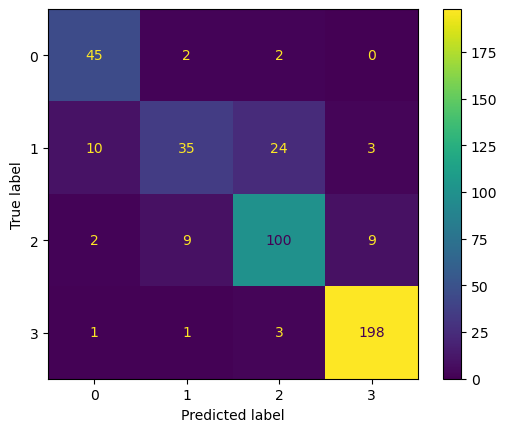

weighted_f1 =  0.8436880730017645


In [30]:
tuned_parameters = [
    {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10], "weights": ['uniform', 'distance']},
]

scores = "f1_weighted"

grid_search = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring=scores
)

model, report, val_acc, weighted_f1 = model_pipeline(X_train, y_train.astype('int'), list(X_test.values), list(y_test.values), grid_search)
print('weighted_f1 = ', weighted_f1)